In [23]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import matplotlib
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
matplotlib.rcParams.update({'font.size': 18,
    'axes.labelsize': 20,'axes.titlesize': 20, 'figure.titlesize' : 20})
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline

In [69]:
exp_name = "norm_compressed"
dirpath = Path(f"/homefs/home/lux70/storage/plaid/artifacts/interpolation/{exp_name}/")

# Load sequences and calculate perplexity

In [70]:
filepath = dirpath / "interpolated_sequences.fasta"
sequences = []
with open(filepath, "r") as f:
    for line in f.readlines():
        sequences.append(line.rstrip("\n"))

In [71]:
from plaid.evaluation import RITAPerplexity

device = torch.device("cuda")
perp_calc = RITAPerplexity(device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [72]:
rita_perp = [perp_calc.calc_perplexity(s) for s in sequences]

(0.0, 25.0)

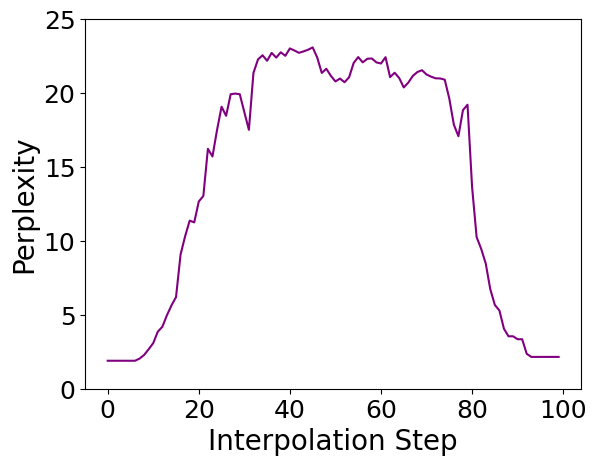

In [73]:
plt.plot(np.arange(len(sequences)), rita_perp, c="purple")
plt.ylabel("Perplexity")
plt.xlabel("Interpolation Step")
plt.ylim(0, 25)

(0.0, 1.1)

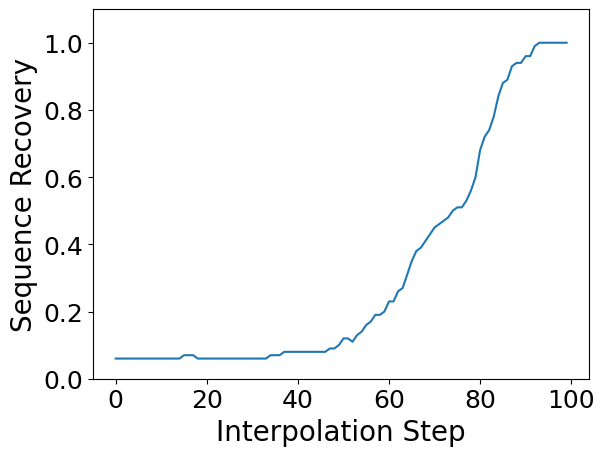

In [75]:
from plaid.utils import calc_sequence_recovery

seq_recov = [calc_sequence_recovery(s, sequences[-1]) for s in sequences]
plt.plot(np.arange(len(sequences)), seq_recov)
plt.ylabel("Sequence Recovery")
plt.xlabel("Interpolation Step")
plt.ylim(0, 1.1)

# Structure

In [64]:

# original_pdb_path = dirpath / "structures" / "interpolation_0.pdb"
# from plaid.evaluation import run_tmalign

from plaid.utils import extract_avg_b_factor_per_residue

plddts = []

for i in range(100):
    fpath = dirpath / "structures" / f"interpolation_{i}.pdb"
    plddt = extract_avg_b_factor_per_residue(fpath)
    plddts.append(np.mean(plddt))

(0.0, 110.0)

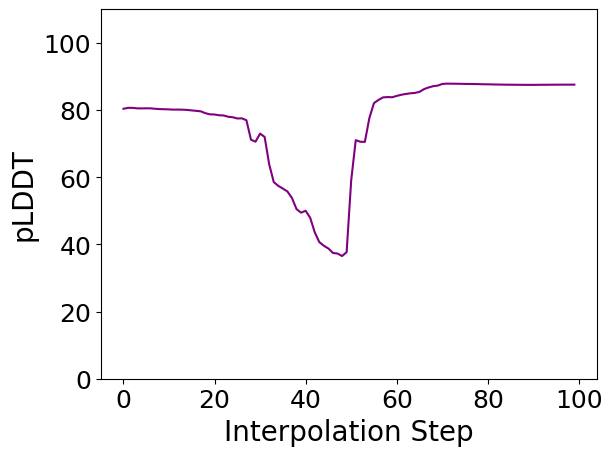

In [65]:
plt.plot(np.arange(len(plddts)), plddts, c="purple")
plt.ylabel("pLDDT")
plt.xlabel("Interpolation Step")
plt.ylim(0, 110)

# Emedding

In [76]:
emb = torch.load(dirpath / "emb.pt")

In [77]:
emb.shape

torch.Size([100, 100, 1024])

<Axes: >

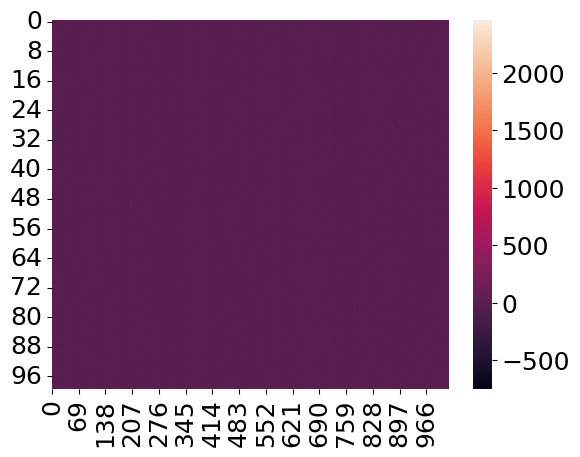

In [79]:
import seaborn as sns
sns.heatmap(emb.numpy()[0])